In [1]:
# %load ../../preconfig.py
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.grid'] = False

from __future__ import division

#import numpy as np
#import pandas as pd
#import itertools

import logging
logger = logging.getLogger()

18 B-Trees
======
B-Trees are balanced search trees, similar to red-black trees, but they are better at minizing disk I/O operations.

We use the number of pages read or written as a approximation of the total time spent accessing the disk.

A B-tree node is usually as large as a whole disk page, and this size limits the number of children a B-tree node can have.

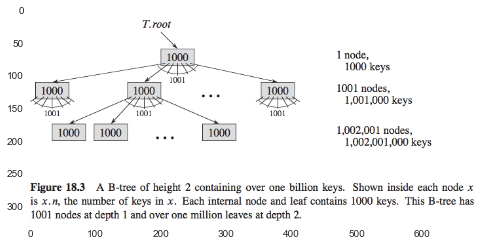

In [2]:
plt.imshow(plt.imread('./res/fig18_3.png'))

### 18.1 Definition of B-trees
#### Properties
1. node attributes:     
   + $x.n$: the number of keys.     
   + $x.\text{keys}$: $x.\text{key}_1 \leq x.\text{key}_2 \leq \dotsb \leq x.\text{key}_n$.    
   + $x.leaf$: True if it is, False otherwise.
   
2. Each internal node has $x.n+1$ points $x.c_1, \dotsc, x.c_{x.n+1}$ to its children.

3. $x.c_i.keys \leq x.key_i \leq x.c_{i+1}.keys$

4. All leaves have the same depth $h$.

5. **minimum degree** of the B-tree $T$: a fixed integer $t \geq 2$.    
   + Every node other than the root must have at least $t-1$ keys.     
   + Every node may contain at most $2t-1$ keys. FULL.
   
The simplest B-tree occurs when $t=2$: 2-3-4 tree.

#### The worst-case height of B-tree
If $n \geq 1$, then for any $n$-key B-tree $T$ of height $h$ and minimum degree $t \geq 2$.    
$$h \leq \log_t \frac{n+1}{2}$$

*Proof*:
The root of a B-tree $T$ contains at least one key, and all other nodes contain at least $t-1$ keys.

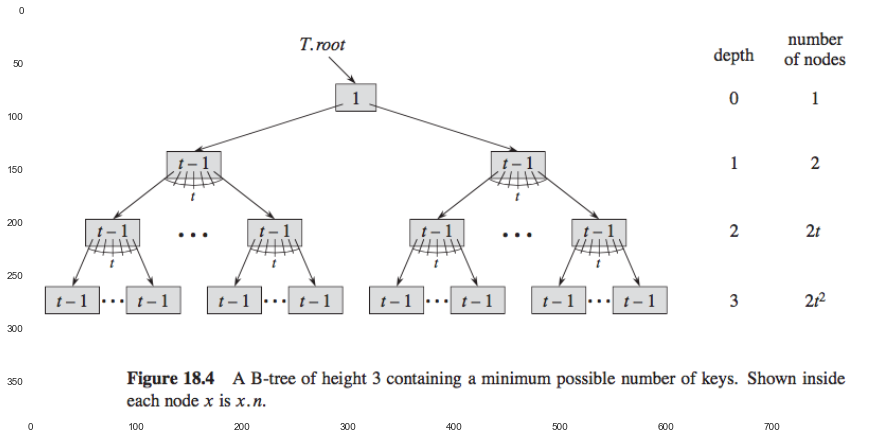

In [3]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread('./res/fig18_4.png'))

the number $n$ of keys statisfies the inequality:
$$ n \geq 1 + (t-1) \sum_{i=1}^h 2t^{i-1} = 2t^h -1$$

B-trees save a factor of about $\lg t$ over red-black trees in the number of nodes examined for most tree operations.

`%maybe: exercise`

### 18.2 Basic operations on B-trees
two conventions:   

1. The root of the B-tree is always in main memory.

2. Any nodes that are passed as parameters must already have had a Disk-Read operation performed on them.

#### Searching a B-tree
We make a multiway branching decision according to the number of the node's children. $O(t lg_t n) = O(t) \times O(h)$.

In [4]:
#todo: code

#### Creating an empty B-tree
$O(1)$ time to allcate one disk page.

In [5]:
#todo: code

#### Inserting a key into a B-tree
As we trave down the tree, we split each full node we meet, in order to assure that the parent is always not full whenever we want to split a full node.

(a) `B-TREE-SPLIT-CHILD(X,I)`

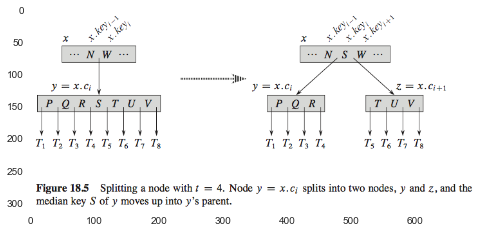

In [6]:
plt.imshow(plt.imread('./res/fig18_5.png'))

If $T$ is full tree, then create a new root node, and split them. (Height increase 1).

(b)
```
B-TREE-INSERT(T,K)
    if T is FULL:
        S = B-TREE-CREATE()
        S.children = T
        R = B-TREE-SPLIT-CHILD(S)
    else
        R = T
    
    B-TREE-INSERT-NONFULL(R,K)
```

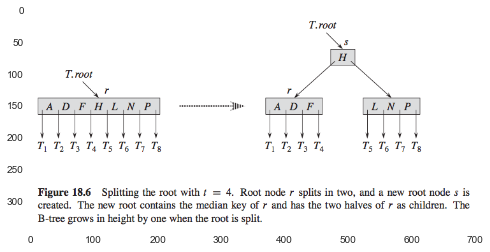

In [7]:
plt.imshow(plt.imread('./res/fig18_6.png'))

(c)
```
B-TREE-INSERT-NONFULL(T,K)
    if T is LEAF
        FIND_AND_INSERT(T,K)
    else
       C = FIND_CHILD(T,K)
       if C is FULL
           N = B-TREE-SPLIT-CHILD(C)
           R = FIND_CHILD(N,K)
       else
           R = T
           
       B-TREE-INSERT-NONFULL(R, K)
```

In [8]:
#todo: exercises

### 18.3 Deleting a key from a B-tree
1. When going down, if the node's child has only $t-1$ keys, move its key down to the child.     
   + if the node is root, then delete the root, use its child as new root. (Height -1).
   
2. If the node to delete is a leaf node, then directly remove it.

3. If the node to delete is a internal node, then     
   + If the key's left child has more than $t-1$ keys, move up the lastest key.    
   + If the key's right child has more than $t-1$ keys, move up the first key.     
   + otherwise, the sum of left and right child's keys is less than $2t-1$, merge them as a new node.
   
Base on the three priciples, we summary all possible cases as follows:

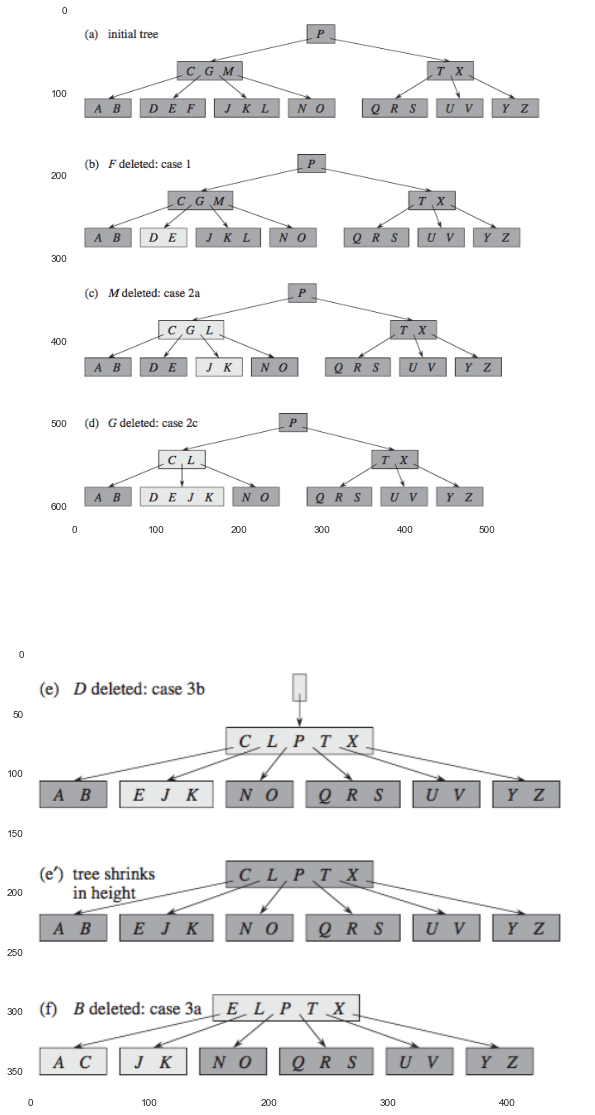

In [15]:
plt.figure(figsize=(10,20))
plt.subplot(2,1,1)
plt.imshow(plt.imread('./res/fig18_8.png'))
plt.subplot(2,1,2)
plt.imshow(plt.imread('./res/fig18_9.png'))

In [16]:
#todo: exercise